<a href="https://colab.research.google.com/github/YifeiCAO/YifeiCAO/blob/main/%E2%80%9CCopy_of_Neuromatch_ThankfulHarrier_ECoG_group%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Miller ECoG data of the memory nback task

includes some visualizations

In [ ]:
!pip install mne

     |████████████████████████████████| 7.0MB 5.2MB/s 


In [ ]:
!pip install sklearn

In [ ]:
#@title Data retrieval
import os, requests

fname = 'memory_nback.npz'
url = "https://osf.io/xfc7e/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


In [ ]:
import numpy as np
memory_data = np.load('memory_nback.npz')
print(['dat'])

['dat']


In [ ]:
#@title Install packages, import matplotlib and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet

from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

     |████████████████████████████████| 4.9MB 5.0MB/s 
     |████████████████████████████████| 399kB 5.3MB/s 
     |████████████████████████████████| 2.7MB 34.1MB/s 


In [ ]:
#@title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[0][1]

print(dat.keys())
dat['V'].shape

dict_keys(['V', 't_off', 'locs', 'srate', 'scale_uv', 't_on', 'target', 'stim_id', 'response', 'rt', 'expinfo', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


(240080, 64)

# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in clinical settings with a variety of tasks. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`dat` contain 3 sessions from 3 subjects, and was not yet used in a publication, so it's fresh data for you to analyze! The following references using other datasets may be useful for the memory n-back task: 

*Brouwer, Anne-Marie, et al. "Estimating workload using EEG spectral power and ERPs in the n-back task." Journal of neural engineering 9.4 (2012): 045008.*

*Grissmann, Sebastian, et al. "Electroencephalography based analysis of working memory load and affective valence in an n-back task with emotional stimuli." Frontiers in human neuroscience 11 (2017): 616.*

Each subject's data is divided into 5 sessions: fixation, exp1, exp2, exp3, fixation, which are consecutive blocks in the data structure (i.e. `alldat[0][0]`, `alldat[0][1]`, ..., `alldat[0][4]` for subject 0). Exp1 is a "0-back" memory experiment, where the subjects have to identify the picture of one of the houses (stimid = 10), which they have memorized at the beginning of the stimulus block. Exp2 is a 1-back memory experiment, where the participants have to respond to images of repeated houses. Finally, exp3 is 2-back where participants respond to pictures of houses that are repeated after another intervening random picture. This task was hard for these participants and most of them did not really respond at all, but the data can still be used to ask questions about overall shifts of neural activity in a hard task when the subjects feel overwhelmed by the memory requirements.

Note that for the third/last subject, no response data was collected, so only the first two subjects can be analyzed for their correct / incorrect trials.   

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across the entire recording and conversion to float16 to minimize size. 

Variables for each block within each subject: 
* `dat['V']`: continuous voltage data (time by channels)
* `dat['expinfo']`: experiment type for this block
* `dat['srate']`: sampling rate for voltage data, always 1000Hz
* `dat['t_on']`: time of stimulus onset in data samples
* `dat['t_off']`: time of stimulus offset, usually 600 samples after `t_on`
* `dat['stim_id`]: identity of house stimulus from 1 to 40. Stimulus 10 was the target in the 0-back task.  
* `dat['target']`: 0 or 1, indicates if this stimulus requires a response
* `dat['response']`: 0 or 1, indicates if the subject actually made a response
* `dat['rt']`: reaction time for trials with a response in voltage data samples (1000Hz). 
* `dat['locs']`: 3D locations of the electrodes on the cortical surface

In [ ]:
dat['V'].shape

(240080, 64)

In [ ]:
dat['target']

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
dat['response']

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
dat['target'] - dat['response']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
#in the one-back task of the first participant, select the index of trials that
#is a target for them to response
import random
one_target_index = [i for i,x in enumerate(dat['target']) if x==1]
one_non = [i for i,x in enumerate(dat['target']) if x==0]

#select 17 trials as training set from total 22 target trials
random.seed(10)
one_train_target_index = random.sample(one_target_index, 17)
print(one_train_target_index)

#select 5 trials as test set for target trials
one_test_target_index = list(set(one_target_index) - set(one_train_target_index))
print(one_test_target_index)

#extract the index for total (22) nontarget trials
random.seed(10)
one_non_index = random.sample(one_non, 22)
print(one_non_index)

#select 17 trials as training set from total 22 nontarget trials
random.seed(10)
one_train_non_index = random.sample(one_non_index, 17)
print(one_train_non_index)

#select 5 trials as test set for target trials
one_test_non_index = list(set(one_non_index) - set(one_train_non_index))
print(one_test_non_index)

[81, 7, 58, 67, 3, 27, 65, 83, 31, 17, 41, 8, 77, 33, 91, 53, 34]
[71, 15, 84, 21, 57]
[95, 5, 70, 79, 99, 1, 36, 76, 80, 46, 26, 98, 90, 52, 12, 20, 78, 96, 61, 30, 2, 93]
[61, 5, 52, 20, 95, 36, 12, 30, 76, 99, 26, 70, 96, 80, 93, 98, 46]
[1, 2, 78, 79, 90]


In [ ]:
from nilearn import plotting  
from nimare import utils

plt.figure(figsize=(8,8))
locs = dat['locs']
view = plotting.view_markers(utils.tal2mni(locs), marker_labels  = ['%d'%k for k in np.arange(locs.shape[0])], marker_color = 'purple', marker_size=5)
view

In [ ]:
# Step1: 
#install.packages("devtools") #This is only required for the first time*   
# Step2:
#library("devtools")
# Step3: 
#install_github("yunshiuan/label4MRI") #This is also only required for the first time*
# Step4: 
#library(label4MRI)

In [ ]:
#import os
#import numpy as np
#import matplotlib.pyplot as plt
#import mne

In [ ]:
# compute spectral power above 50Hz and low-pass below 10Hz
# power is always positive, so we normalize it by its average
from scipy import signal

# pick subject 1 and experiment 1 
dat = alldat[1][1]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype = 'high', fs=1000)
V = signal.filtfilt(b,a,V,0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype = 'low', fs=1000)
V = signal.filtfilt(b,a,V,0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

In [ ]:
V.shape

(240160, 64)

***Yifei***:Firstly, we need to epoch the data we extracted from the previous step. According to Jafarpour et al., (2017), we extract the time period of 20 ms preceed the appearance of stimuli and 500 ms after the stimuli. And then, we split the time period into 26 eaqual time bins (each one of 20 ms duration).

In [ ]:
#index for target trials
target_index_onset = dat['t_on'][one_train_target_index]
print(target_index_onset)

#index for non-target trials
non_index_onset = dat['t_on'][one_train_non_index]
print(non_index_onset)

[195001  22121 144401 164201  13321  66121 159801 199401  74921  44121
  96921  24321 186201  79321 217001 133401  81521]
[151001  17721 131201  50721 225801  85921  33121  72721 184001 234601
  63921 170801 228001 192801 221401 232401 107921]


***Yifei***: We can retrieve the epoched ECoG data involved in the targeted trials.

In [ ]:
# divide into trials and average
nt, nchan = V.shape
nstim = len(target_index_onset)

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-20, 600)
ts = target_index_onset[:,np.newaxis] + trange
V_epochs_target = np.reshape(V[ts, :], (nstim, 620, nchan))
#V_epochs_stim_target = V_epochs[0]
#V_epochs_channel = V_epochs[:,:,0]
#V_resp = (V_epochs[dat['response']==1]).mean(0)
#V_base  = (V_epochs[dat['response']==0]).mean(0)
V_epochs_target.shape

(17, 620, 64)

***Yifei***: Also we need to select 22 non-target trials randomly to match with the 22 targeted-trials.

In [ ]:
# divide into trials and average
nt, nchan = V.shape
nstim_non = len(non_index_onset)

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-20, 600)
ts_non = non_index_onset[:,np.newaxis] + trange
V_epochs_non = np.reshape(V[ts_non, :], (nstim_non, 620, nchan))
#V_epochs_stim1 = V_epochs[0]
#V_epochs_channel1 = V_epochs[:,:,0]
#V_resp = (V_epochs[dat['response']==1]).mean(0)
#V_base  = (V_epochs[dat['response']==0]).mean(0)
V_epochs_non.shape

(17, 620, 64)

In [ ]:
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import heapq

#extract points from target epochs and non epochs to do the t-test
Cha1_V_epochs_target = V_epochs_target[:,:,0]
Cha1_V_epochs_non = V_epochs_non[:,:,0]
tar_time_point = Cha1_V_epochs_target[:,1]
non_time_point = Cha1_V_epochs_non[:,1]
stats.ttest_ind(tar_time_point.T,non_time_point.T)

t_chan = np.random.rand(2)
p_chan = np.random.rand(2)
for i in range(620):
  tar_time_point = Cha1_V_epochs_target[:,i]
  non_time_point = Cha1_V_epochs_non[:,i]
  tar_time_point = Cha1_V_epochs_target[:,i]
  non_time_point = Cha1_V_epochs_non[:,i]
  t,p=stats.ttest_ind(tar_time_point.T,non_time_point.T,equal_var = False)
  p_chan = np.append(p_chan,p)
  t_chan = np.append(t_chan,t)
  #p_chan = np.append(p_chan,p)
t_chan = np.delete(t_chan,[0,1])
print(p_chan)
#p_chan = np.delete(t_chan,[0,1])
#plt.plot(t_chan)
#plt.show()

#return the first 5 t_values and their indexes
t_chan_fac = heapq.nlargest(5, t_chan) #求最大的三个元素，并排序
t_chan_ind = map(t_chan_fac.index, heapq.nlargest(5, t_chan)) #求最大的三个索引    nsmallest与nlargest相反，求最小

t_chan_ind
#plt.plot(t_chan)
#plt.show()

#lt.plot(p_chan)
#plt.show()



In [ ]:
#use for every electrodes
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import heapq

pvalue_chan = np.random.randn(5)
pindex_chan = np.random.randn(5)
for i in range(64):
  Cha_V_epochs_target = V_epochs_target[:,:,i]
  Cha_V_epochs_non = V_epochs_non[:,:,i]
  t_chan = np.random.rand(2)
  p_chan = np.random.rand(2)
  for a in range(620):
    tar_time_point = Cha_V_epochs_target[:,a]
    non_time_point = Cha_V_epochs_non[:,a]
    tar_time_point = Cha_V_epochs_target[:,a]
    non_time_point = Cha_V_epochs_non[:,a]
    t,p=stats.ttest_ind(tar_time_point.T,non_time_point.T)
    t_chan = np.append(t_chan,t)
    p_chan = np.append(p_chan,p)
  t_chan = np.delete(t_chan,[0,1])
  p_chan = np.delete(t_chan,[0,1])
  p_chan_fea = np.argsort(p_chan.T)
  p_chan_fea = p_chan_fea[0:5]
  pindex_chan = np.vstack((pindex_chan,p_chan_fea))
pindex_chan = np.delete(pindex_chan,1,0)

  #p_chan_fea = p_chan_fea[0,4]
  #t_chan_fac = heapq.nlargest(5, t_chan) #求最大的三个元素，并排序
  #t_chan_ind = list(map(t_chan_fac.index, heapq.nlargest(5, t_chan))) #求最大的三个索引    nsmallest与nlargest相反，求最小
  #tvalue_chan = np.vstack((tvalue_chan,t_chan_fac))
  #tindex_chan = np.vstack((tindex_chan,t_chan_ind))
  #plt.subplot(8, 8, i+1)
  #plt.subplots_adjust(wspace = 1, hspace = 3)
  #plt.ylim([-3,5])
  #plt.plot(t_chan)

#plt.savefig(f"{images_dir}/t_chan.png")


In [ ]:
pindex_chan.shape

(64, 5)

Yifei: Extract the features according to the index from the pindex_chan

In [ ]:
#target features in 1st channel
#total_target_features = np.ones((17,5))
#for i in range(64):
voltage_index = pindex_chan[1,:]
voltage_index = voltage_index.tolist()
V_epochs_target_fir = V_epochs_target[:,:,1]
target_total_features = np.random.randn(17)
for a in range(5):
  tpoint_ind = int(voltage_index[a])
  target_features = V_epochs_target_fir[:,tpoint_ind]
  target_total_features = np.vstack((target_total_features,target_features))
target_total_features = np.delete(target_total_features,1,0)
t_target_total_features = target_total_features.T
#total_target_features = np.array([total_target_features,t_target_total_features])



In [ ]:
#non-target features in 1st channel
#total_target_features = np.ones((17,5))
#for i in range(64):
voltage_index = pindex_chan[1,:]
voltage_index = voltage_index.tolist()
V_epochs_non_fir = V_epochs_non[:,:,1]
non_total_features = np.random.randn(17)
for a in range(5):
  tpoint_ind = int(voltage_index[a])
  non_features = V_epochs_non_fir[:,tpoint_ind]
  non_total_features = np.vstack((non_total_features,non_features))
non_total_features = np.delete(non_total_features,1,0)
t_non_total_features = non_total_features.T

In [ ]:
total_features = np.vstack((t_target_total_features,t_non_total_features))

In [ ]:
total_features.shape

(34, 5)

In [ ]:
X = total_features
X.shape

(34, 5)

***Yifei***: Here, we extract the features within each time bin, the features are the Voltage information collected in the data.

In [ ]:
#create array Y, for labels
y1 = np.ones((17,1))
y2 = np.zeros((17,1))
y = np.vstack((y1,y2))

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Extract training test

In [ ]:
one_test_target_index
target_test_index_onset = dat['t_on'][one_test_target_index]


nt, nchan = V.shape
nstim = len(target_test_index_onset)

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-20, 600)
ts = target_test_index_onset[:,np.newaxis] + trange
V_epochs_test_target = np.reshape(V[ts, :], (nstim, 620, nchan))
#V_epochs_stim_target = V_epochs[0]
#V_epochs_channel = V_epochs[:,:,0]
#V_resp = (V_epochs[dat['response']==1]).mean(0)
#V_base  = (V_epochs[dat['response']==0]).mean(0)
V_epochs_test_target.shape

cha1_V_epochs_test_target = V_epochs_test_target[:,:,1]


voltage_index = pindex_chan[1,:]
voltage_index = voltage_index.tolist()
cha1_V_epochs_test_target = V_epochs_test_target[:,:,1]
target_test_total_features = np.random.randn(5)
for a in range(5):
  tpoint_ind = int(voltage_index[a])
  target_test_features = cha1_V_epochs_test_target[:,tpoint_ind]
  target_test_total_features = np.vstack((target_test_total_features,target_test_features))
target_test_total_features = np.delete(target_test_total_features,1,0)
t_test_target_total_features = target_test_total_features.T

t_test_target_total_features[0,:]

array([-1.57156647,  0.93357025,  0.90607571,  0.9466379 ,  0.89174068])

In [ ]:
clf.predict([[-1.57156647,  0.93357025,  0.90607571,  0.9466379 ,  0.89174068]])

array([1.])

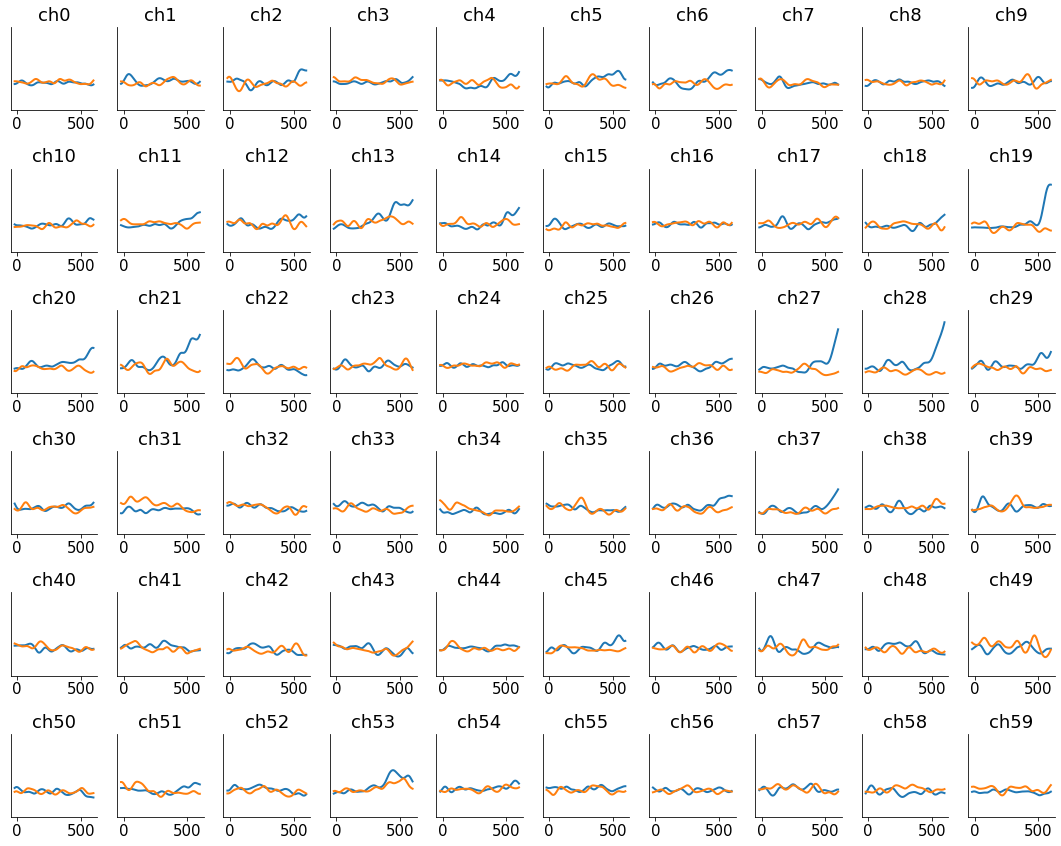

In [ ]:
# let's find the electrodes that distinguish target from nontarget
# note these are event-related potentials
from matplotlib import pyplot as plt

V_target = (V_epochs_target).mean(0)
V_non  = (V_epochs_non).mean(0)
plt.figure(figsize=(15,12))
for j in range(60):
  ax = plt.subplot(6,10,j+1)
  plt.plot(trange, V_target[:,j], lw=2)
  plt.plot(trange, V_non[:,j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])

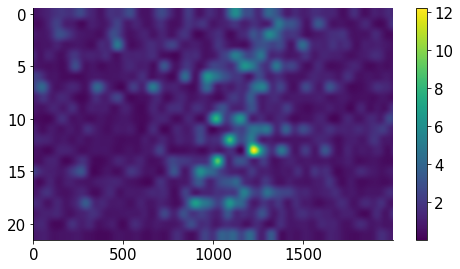

In [ ]:
# let's look at all the response trials for the electrode that has a significant response
plt.subplot(1,3,1)
plt.imshow(V_epochs[dat['response']==1,:,21].astype('float32'), aspect='auto')
plt.colorbar()

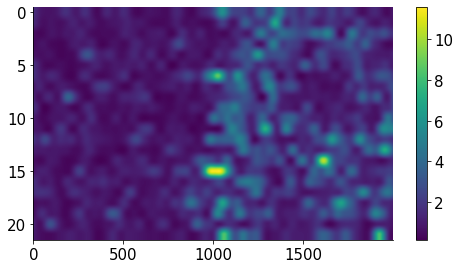

In [ ]:
# this electrode has a more transient response
plt.subplot(1,3,1)
plt.imshow(V_epochs[dat['response']==1,:,27].astype('float32'), aspect='auto')
plt.colorbar()

In [ ]:
# to do: do these responses covary with the reaction times? are they present on trials where there is no motor response? 